In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random

In [7]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getrew(me, it):
        return [me.arm1[it],me.arm2[it]]

In [8]:
class armsnew:
    def __init__(me,scalea,delta=0.1,T=1000):
        me.arm1=random.normal(loc=0, scale=scalea, size=T)
        me.arm2=random.normal(loc=delta, scale=scalea, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getrew(me, it):
        return [me.arm1[it],me.arm2[it]]

In [17]:
class bandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.mean2=0
        me.count2=0
    
    def update(me,reward,arm):
        if arm==1:
            updt= me.mean1*me.count1+reward
            me.count1+=1
            me.mean1=updt/me.count1
        elif arm==2: 
            updt= me.mean1*me.count2+reward
            me.count2+=1
            me.mean2=updt/me.count2
        else:
            pass
            
    def fullupdate(me,rewardvec):
        me.update(rewardvec[0],1)
        me.udpdate(rewardvec[1],2)
        
    def returnarm(me):
        return me.mean1, me.mean2

OPTIMAL T0 TAKING DELTA AND T

In [51]:


#_____________________________________
def optimalGETC(T,delta):
    answer=4/(delta**2)*math.log(T*delta**2/4)
    answer=math.ceil(answer)
    return answer

In [44]:
optimalGETC(1000,0.1) 

367

In [52]:
def ETC(delta,T=1000):
    reward=0
    reward1=0
    reward2=0
    arm=arms(delta,T)
    known_bandits=bandits()
    full_bandits=bandits()
    m=optimalGETC(T,delta)
    chk=0
    reg=[]
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
    print(i) 
    
    print(known_bandits.returnarm())
    print([reward1,reward2,reward])
    regret=np.amax([reward1,reward2]) -reward
    return regret
            
        
        
        
    

ETC used Finally

In [ ]:


def ETC0(arms,T=1000,T_o=367):# added arms, to keep arms constant b/w rounds!
    reward=0
    reward1=0
    reward2=0
    arm=arms
    known_bandits=bandits()
    full_bandits=bandits()
    m=T_o/2
    chk=0
    reg=[]
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            regret=np.amax([reward1,reward2]) -reward
            reg.append(regret)
#     print(i) 
#     print(known_bandits.returnarm())
#     print([reward1,reward2,reward])
#     regret=np.amax([reward1,reward2]) -reward
    return reg
            
        
        
        
    

 40%|█████████████████████████████████▏                                                 | 4/10 [00:58<01:27, 14.65s/it]


KeyboardInterrupt: 

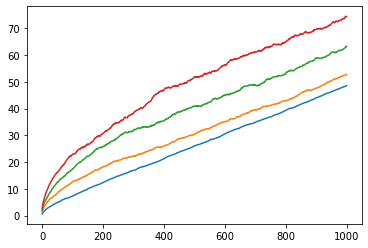

In [50]:
from tqdm import tqdm
median=[0 for i in range(1000)]
maxi=[-22 for i in range(1000)]
mini=[22 for i in range(1000)]
for i in tqdm(range(1000)):
    arm=arms(0.1,1000)
    for j in range (10000):
        reg=GETC0(0.1,1000,i,arm)
        median[i]+=reg
        if reg>maxi[i]:
            maxi[i]=reg
        elif reg<mini[i]:
            mini[i]=reg

    median[i]=median[i]/1000
        

Pickle to store data for 10,000 iter. as it took 15 hrs to RUN!!!!

In [176]:
# import pickle
# filename = 'median'
# outfile = open(filename,'wb')
# pickle.dump(median,outfile)
# outfile.close()

In [37]:
# import pickle
# file = open("median",'rb')

# median=pickle.load(file)

In [26]:
# print(median)

In [38]:
# file1 = open("maxi",'rb')
# file2 = open("mini",'rb')
# maxi=pickle.load(file1)
# mini=pickle.load(file2)


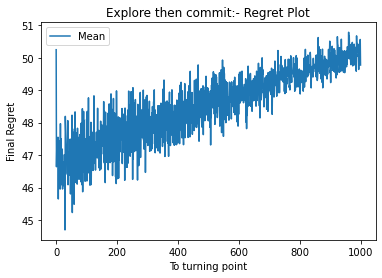

In [265]:
import matplotlib.pyplot as plt
eta1=0
plt.plot(median,label='Mean')
# plt.plot(maxi,label='FTPL with eta='+str(eta1*10))
# plt.plot(mini,label='FTPL with eta='+str(eta1*100))
# plt.plot(p4_r,label='FTPL with eta='+str(eta1/10))
# plt.plot(p5_r,label='FTPL with eta='+str(eta1/100))
plt.title("Explore then commit:- Regret Plot")
plt.xlabel('To turning point')
plt.ylabel('Final Regret')

plt.legend(loc='best')
plt.show()

In [266]:
len(median)

1000

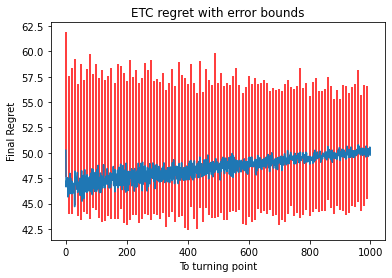

In [40]:
import numpy as np
x = np.array(range(1000))
yerr=[]
errmax=[0 for i in range(1000)]
errmin=[0 for i in range(1000)]
for i in range(1000):
    if i%10==0:
        yerr.append([median[i] - mini[i], maxi[i] - median[i]]) 
    else:
        yerr.append([0,0])
#         errmax[i]= maxi[i]
#         errmin[i]=mini[i]
# plt.plot(errmin)
yerr = np.transpose(yerr)
plt.errorbar( x, median, yerr, ecolor=['red'], )
# plt.show()
plt.xlabel('To turning point')
plt.ylabel('Final Regret')
plt.title("ETC regret with error bounds")
# plt.legend(loc='best')
plt.show()